<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/8_CNN_with_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor()
)

100%|██████████| 170498071/170498071 [00:18<00:00, 9238080.46it/s]


Extracting ./cifar-10-python.tar.gz to .


In [3]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [5]:
# Behaves differently from MNIST / Fashin MNIST
# It is a list
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [6]:
# Number of classes
K = len(set(train_dataset.targets))
print(f"Number of classes: {K}")

Number of classes: 10


In [7]:
# Data loader
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [8]:
# The data transformer mapped the data to (0, 1) and also moved the color channel before height/width

tmp_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True
)

for x, y in tmp_loader:
    print(x)
    print(x.shape)
    break

tensor([[[[0.1373, 0.1490, 0.1020,  ..., 0.1176, 0.1137, 0.0667],
          [0.1294, 0.1333, 0.0980,  ..., 0.0980, 0.0784, 0.0588],
          [0.1137, 0.1333, 0.0588,  ..., 0.0667, 0.0353, 0.0627],
          ...,
          [0.5255, 0.5020, 0.4157,  ..., 0.9216, 0.9137, 0.8157],
          [0.4706, 0.5608, 0.5725,  ..., 0.9020, 0.9098, 0.8157],
          [0.6235, 0.7255, 0.6784,  ..., 0.8863, 0.8235, 0.6627]],

         [[0.2706, 0.2667, 0.3020,  ..., 0.2353, 0.3294, 0.3804],
          [0.2824, 0.2667, 0.3137,  ..., 0.3137, 0.3569, 0.3804],
          [0.2196, 0.2824, 0.3451,  ..., 0.3608, 0.3451, 0.3922],
          ...,
          [0.4157, 0.3843, 0.3098,  ..., 0.7569, 0.7608, 0.6863],
          [0.3529, 0.4392, 0.4627,  ..., 0.7412, 0.7608, 0.6863],
          [0.4902, 0.6078, 0.5765,  ..., 0.7412, 0.6863, 0.5373]],

         [[0.1529, 0.1333, 0.1451,  ..., 0.1373, 0.1725, 0.1569],
          [0.1569, 0.1255, 0.1490,  ..., 0.1608, 0.1647, 0.1569],
          [0.1098, 0.1373, 0.1569,  ..., 0

In [9]:
# Define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()

    # Define the conv layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    # Define the linear layers
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128 * 3 * 3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [10]:
# Instantiate the model
model = CNN(K)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [12]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [15]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for interation in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []

    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # print statistics
    train_loss = np.mean(train_loss)

    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[interation] = train_loss
    test_losses[interation] = test_loss

    dt = datetime.now() - t0
    print(f"Epoch {interation+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")
  return train_losses, test_losses

In [16]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, 15)

Epoch 1/15, Train Loss: 1.6905, Test Loss: 1.4526, Duration: 0:00:10.928729
Epoch 2/15, Train Loss: 1.3959, Test Loss: 1.3405, Duration: 0:00:10.115967
Epoch 3/15, Train Loss: 1.2865, Test Loss: 1.2700, Duration: 0:00:10.222471
Epoch 4/15, Train Loss: 1.1985, Test Loss: 1.1919, Duration: 0:00:10.105670
Epoch 5/15, Train Loss: 1.1291, Test Loss: 1.1566, Duration: 0:00:10.184332
Epoch 6/15, Train Loss: 1.0687, Test Loss: 1.1558, Duration: 0:00:09.459175
Epoch 7/15, Train Loss: 1.0193, Test Loss: 1.0831, Duration: 0:00:10.359606
Epoch 8/15, Train Loss: 0.9728, Test Loss: 1.0964, Duration: 0:00:10.196693
Epoch 9/15, Train Loss: 0.9347, Test Loss: 1.0511, Duration: 0:00:10.166053
Epoch 10/15, Train Loss: 0.8984, Test Loss: 1.0442, Duration: 0:00:10.260205
Epoch 11/15, Train Loss: 0.8619, Test Loss: 1.0277, Duration: 0:00:09.378439
Epoch 12/15, Train Loss: 0.8246, Test Loss: 1.0211, Duration: 0:00:10.174511
Epoch 13/15, Train Loss: 0.7978, Test Loss: 1.0368, Duration: 0:00:10.246781
Epoch 14

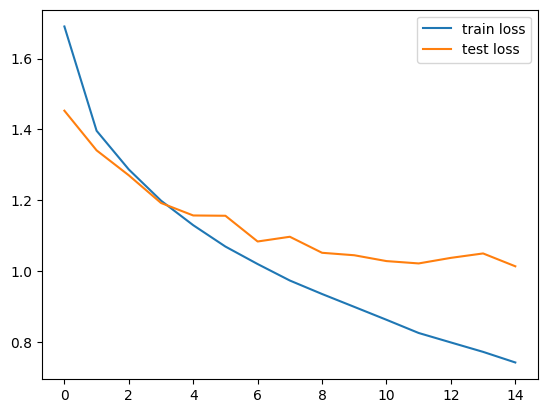

In [17]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [19]:
# Accuracy

model.eval()
n_correct = 0.
n_total = 0.

for inputs, targets in train_loader:
  # move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # forward
  outputs = model(inputs)

  # get prediction
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # forward
  outputs = model(inputs)

  # get prediction
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.7457, Test acc: 0.6495


In [20]:
# Confusion matrix
from types import FrameType
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Confusion matrix, without normalization
[[743  25  40   7   9   2  11  13 118  32]
 [ 24 792  13   7   3   7   8   6  53  87]
 [ 92  10 620  45  74  50  46  35  20   8]
 [ 45   7 161 411  54 158  67  44  25  28]
 [ 46   4 185  51 511  41  52  87  19   4]
 [ 27  12 137 164  41 501  29  58  23   8]
 [ 15   5  83  63  48  40 713  11  10  12]
 [ 28   5  62  38  57  51  11 719  11  18]
 [ 79  30  19  15   7   7   6   1 806  30]
 [ 66 116  27  18   7  14  12  27  53 660]]


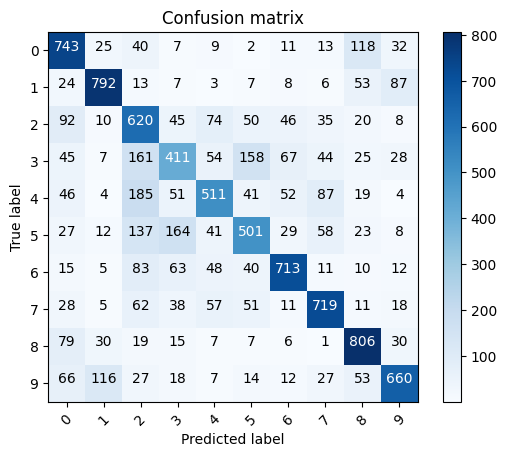

In [22]:
# get all predictions in an arrat and plot confusion matrix

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])

for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # forward pass
  outputs = model(inputs)

  # get prediction
  _, predictions = torch.max(outputs, 1)

  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# label mapping
labels = '''airplane bird cat deer dog frog horse ship truck'''.split()

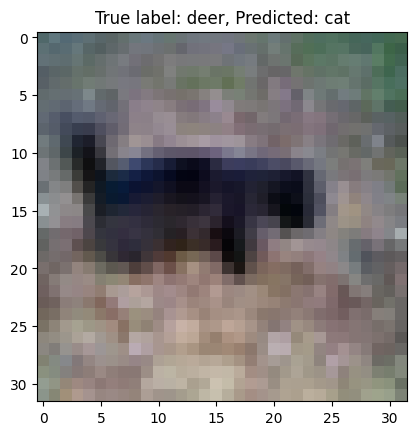

In [35]:
# Show some miscalssified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, 3), cmap='gray')
plt.title(f"True label: {labels[y_test[i]]}, Predicted: {labels[p_test[i]]}")
plt.show()
